In [1]:
import json
import math 
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from word2vec import get_vector

from eden_ai import get_labels

In [2]:
def plot_results(results, no_of_bins: int) -> None:
    views = []
    channel_sub_counts = []

    for video in results.values():
        view_count = video["video"]["view_count"]
        channel_sub_count = video["channel"]["subscriber_count"]

        views.append(view_count)
        channel_sub_counts.append(channel_sub_count)

    normalized_views = [
        math.tanh(math.log(view) / math.log(sub_count)) * no_of_bins
        for view, sub_count in zip(views, channel_sub_counts)
    ]

    plt.hist(normalized_views, bins=no_of_bins)
    plt.xlabel("Score")
    plt.ylabel("# of Videos")
    plt.title(f"Video Score Distribution")
    plt.show()

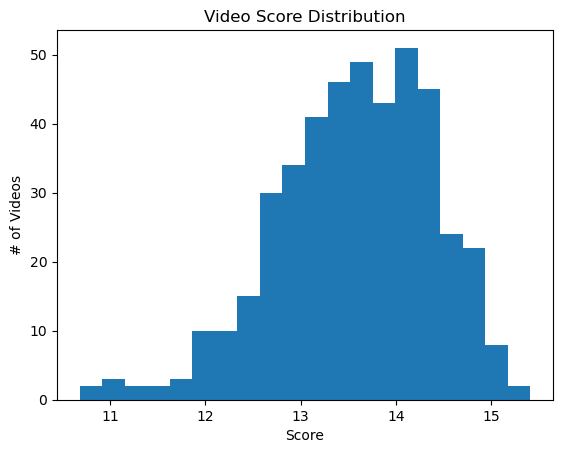

In [3]:
with open("videos.json", "r") as f:
    results = json.loads(f.read())

plot_results(results, no_of_bins=20)

In [4]:
no_of_bins = 20

videos = {}
with open('videos.json', 'r') as f: 
    videos = json.load(f)

x = []
y = []

for video in videos.values():
    description = video["video"]["description"].split() or []
    tags = video["video"].get('tags', []) or []
    labels = [inner["label"] for inner in video["video"]["thumbnail_objects"]] or []

    words = description + tags + labels
    x.append(get_vector(words))

    view = video['video']['view_count']
    sub_count = video['channel']['subscriber_count']

    y.append(int(math.tanh(math.log(view) / math.log(sub_count)) * no_of_bins))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# Create an instance of the Random Forest Regression model
model = RandomForestRegressor()

# Train the model on the training data
model.fit(x_train, y_train)

RandomForestRegressor()

In [7]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

for index in range(len(x_test)):
    print(index, y_pred[index], y_test[index])

Mean Squared Error: 0.6863988764044943
0 12.92 11
1 12.78 13
2 13.49 13
3 13.01 13
4 13.56 14
5 13.05 14
6 12.97 13
7 12.81 14
8 13.11 14
9 13.33 12
10 13.42 13
11 13.31 13
12 13.38 14
13 13.66 14
14 12.78 14
15 13.17 13
16 13.04 12
17 12.92 13
18 13.49 14
19 13.49 14
20 13.34 13
21 13.18 14
22 12.68 12
23 13.11 12
24 13.33 13
25 12.47 12
26 13.02 13
27 13.23 13
28 13.33 12
29 13.53 14
30 13.11 14
31 13.68 14
32 12.82 14
33 12.9 12
34 12.85 12
35 13.04 13
36 13.34 14
37 13.3 14
38 12.8 14
39 13.0 12
40 12.39 13
41 13.0 13
42 12.75 13
43 13.11 13
44 13.1 14
45 13.58 14
46 13.64 14
47 13.28 14
48 12.68 14
49 12.8 13
50 13.24 13
51 13.25 15
52 13.39 13
53 12.57 13
54 13.14 13
55 13.42 14
56 12.79 13
57 13.14 12
58 13.08 14
59 13.31 14
60 12.77 13
61 12.94 12
62 13.24 12
63 13.5 13
64 13.14 13
65 12.4 13
66 13.18 13
67 13.41 13
68 12.82 13
69 13.03 14
70 12.9 14
71 12.85 13
72 13.3 14
73 13.08 14
74 12.72 14
75 13.33 13
76 13.16 14
77 13.08 13
78 13.06 12
79 12.76 14
80 13.03 10
81 12.86 1

In [8]:
def predict(tags, description, thumbnail_url):
    labels = [inner['label'] for inner in get_labels(image_url=thumbnail_url)] or []

    words = description + tags + labels
    words_vector = get_vector(words)

    return model.predict([words_vector])[0]

In [9]:
def convert_to_view_count(pred, sub_count):
    result = sub_count ** np.arctanh(pred / 20)
    return result

In [10]:
tags = ["duzce", "duzce earthquake", "duzce news", "duzce turkey", "earthquake", 
               "earthquake in turkey", "erdogan", "gdnpfpnewsworld", "golkaya", "golkaya earthquake", 
               "haber", "istanbul", "istanbul earthquake", "istanbul news", "istanbul news anchor", 
               "tgrt", "turkey", "turkey 2022", "turkey earthquake", "turkey earthquake live", "turkey earthquake video", 
               "turkey latest", "turkey latest news", "turkey news", "turkey quake", "turkish anchor", "turkish news reporter", 
               "turkish reporter", "world"]

description = """A magnitude-5.9 earthquake hit a town in northwestern Turkey early Wednesday, causing damage to some buildings and widespread panic. 
Subscribe to Guardian News on YouTube ► http://bit.ly/guardianwiressub

At least 68 people were injured, mostly while trying to flee homes. Footage released by Turkish private broadcaster TGRT shows how night-time anchorman Ersel Hoskara coninued presenting as the quake was felt in Istanbul while the graphic underneath him read 'Breaking news: moment of the earthquake live on air'. The earthquake was centered in the town of Golkaya, in Duzce province, some 200 kilometers (125 miles) east of Istanbul, the Disaster and Emergency Management Presidency said. 

The Guardian publishes independent journalism, made possible by supporters. Contribute to The Guardian today ► https://bit.ly/3uhA7zg

Sign up to the Guardian's free new daily newsletter, First Edition ► http://theguardian.com/first-edition

Website ► https://www.theguardian.com
Facebook ►https://www.facebook.com/theguardian
Twitter ► https://twitter.com/guardian
Instagram ► https://instagram.com/guardian

The Guardian on YouTube:
The Guardian ► https://bit.ly/guardiannewssubs
Guardian Australia ► https://bit.ly/guardianaussubs
Guardian Football ► https://bit.ly/gdnfootballsubs
Guardian Sport ► https://bit.ly/gdnsportsubs
Guardian Live ► https://bit.ly/guardianlivesubs

#Istanbul #News #Earthquake #Istanbul #News""".split()

thumbnail_url = "https://i3.ytimg.com/vi/SP9_USUZn68/maxresdefault.jpg"

pred = predict(tags, description, thumbnail_url)
print(y)

pred_view_count = convert_to_view_count(pred, sub_count=3_090_000)
print(pred, pred_view_count)

[12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 13, 14, 14, 11, 13, 10, 13, 14, 14, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 14, 14, 14, 14, 14, 14, 12, 12, 13, 12, 13, 12, 12, 14, 12, 12, 13, 12, 12, 12, 12, 12, 14, 13, 12, 12, 12, 13, 12, 13, 12, 13, 12, 13, 13, 13, 14, 13, 14, 14, 14, 13, 14, 14, 14, 14, 14, 14, 13, 13, 14, 14, 14, 14, 13, 13, 13, 14, 13, 13, 13, 14, 14, 14, 13, 14, 14, 14, 14, 14, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 14, 14, 14, 14, 15, 14, 15, 14, 14, 10, 11, 11, 11, 11, 13, 12, 12, 11, 13, 12, 12, 12, 12, 12, 14, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 14, 14, 14, 14, 12, 13, 12, 13, 12, 14, 12, 14, 13, 14, 12, 14, 12, 13, 13, 14, 12, 13, 13, 14, 13, 14, 13, 13, 13, 14, 13, 13, 13, 14, 11, 12, 13, 13, 12, 13, 13, 13, 13, 13, 12, 13, 13, 13, 13, 13, 14, 13, 13, 13, 13, 13, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 14, 13, 13, 13, 13, 12, 13, 13, 13, 13, 13, 14, 12, 14, 14, 13, 14, 14,